In [1]:
import os
import sys
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
sys.path.append('/scratch/hz3883/Week11-IntroDFT')

In [2]:
from psikit import Psikit

In [3]:
pk = Psikit()


  Memory set to   3.725 GiB by Python driver.
  Threads set to 4 by Python driver.


In [4]:
pk.read_from_smiles('CN1C=NC2=C1C(=O)N(C(=O)N2C)C')

In [5]:
pk.optimize()

Optimizer: Optimization complete!


-676.3571176557299

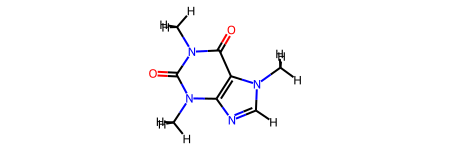

In [6]:
pk.mol

In [7]:
#caculate chages
print(pk.calc_resp_charges())
print(pk.calc_mulliken_charges())
print(pk.calc_lowdin_charges())

[-0.20076923  0.07076825  0.08502058 -0.47143525  0.12599983 -0.10081795
  0.36323853 -0.49566945 -0.04585332  0.36242528 -0.52853019  0.02496369
  0.00600309 -0.03370782  0.11020261  0.11020261  0.11020261  0.17300358
  0.05006104  0.05006104  0.05006104  0.06152314  0.06152314  0.06152314]
[-0.11403644 -0.69387264  0.38638728 -0.62282753  0.63500493  0.09327068
  0.89980013 -0.63013971 -0.87907886  1.09567353 -0.62723483 -0.87748763
 -0.12041771 -0.12349449  0.12973228  0.1672307   0.1673136   0.18241192
  0.16749673  0.14891686  0.14894236  0.14561214  0.1456083   0.1751884 ]
[-0.13210145 -0.05231939  0.07733223 -0.27541585  0.1396012  -0.1255126
  0.29395652 -0.39449257 -0.18832785  0.34851674 -0.39857635 -0.15253237
 -0.13203409 -0.13824722  0.10405684  0.11674182  0.11779437  0.12134248
  0.11931865  0.10837952  0.10772875  0.10709315  0.10598914  0.12170833]


In [8]:
mol = pk.mol
atoms = mol.GetAtoms()

In [9]:
data = {'Symbol':[atom.GetSymbol() for atom in atoms],
        'RESP': [float(atom.GetProp('RESP')) for atom in atoms],
        'MULLIKEN': [float(atom.GetProp('MULLIKEN')) for atom in atoms],
       'LOWDIN':  [float(atom.GetProp('LOWDIN')) for atom in atoms]}

In [10]:
df = pd.DataFrame(data)

In [11]:
df.round(3)

,Symbol,RESP,MULLIKEN,LOWDIN
0,C,-0.201,-0.114,-0.132
1,N,0.071,-0.694,-0.052
2,C,0.085,0.386,0.077
3,N,-0.471,-0.623,-0.275
4,C,0.126,0.635,0.140
5,C,-0.101,0.093,-0.126
6,C,0.363,0.900,0.294
7,O,-0.496,-0.630,-0.394
8,N,-0.046,-0.879,-0.188
9,C,0.362,1.096,0.349


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

In [13]:
plt.style.use('ggplot')

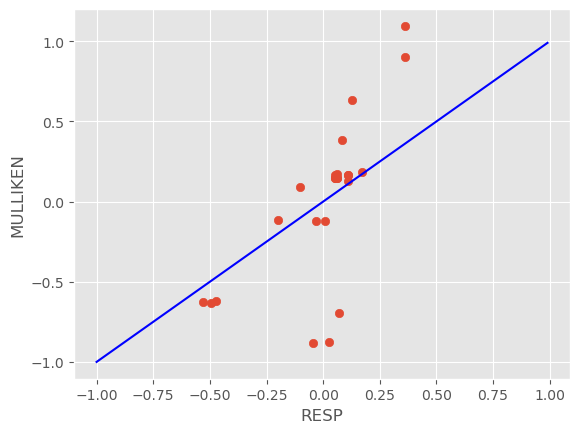

In [14]:
# RESP charge and MULLIKEN charge shows high correlation
plt.scatter(df.RESP, df.MULLIKEN)
plt.xlabel('RESP')
plt.ylabel('MULLIKEN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

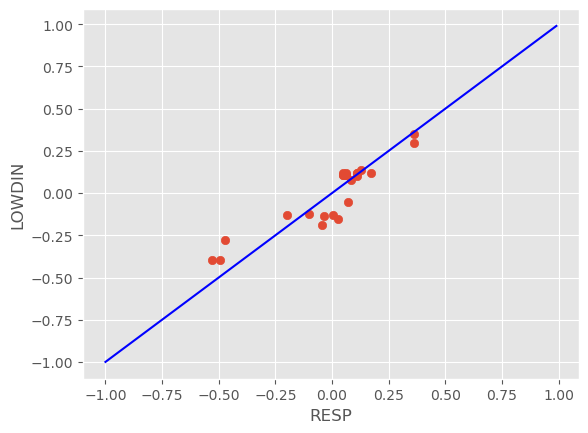

In [15]:
plt.scatter(df.RESP, df.LOWDIN)
plt.xlabel('RESP')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

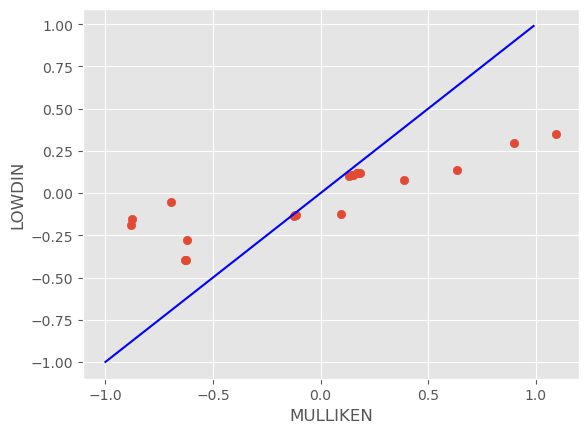

In [16]:
plt.scatter(df.MULLIKEN, df.LOWDIN)
plt.xlabel('MULLIKEN')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')